# Getting Global Warming Rates

Easier to do this with xarray than in R. Objective is simple, process full global timeline to table of global temperature and anomalies. Use that table to get global warming rates for the temperature report.

In [1]:
# Libraries
import requests
import os
import xarray as xr
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import oisstools as ot

# Set the workspace - local/ docker
box_root = ot.set_workspace("local")

# Set the climatology period
reference_period = "1982-2011"

# Set climatology source choices
climatologies = {"1982-2011" : "1982to2011_climatology",
                 "1991-2020" : "1991to2020_climatology"}

climate_period = climatologies[reference_period]

# document what choices were made on last run:
print(f"Working via directory at: {box_root}")
print(f"Calculating Anomalies for {reference_period} reference period using {climate_period}")

Working via directory at: /Users/akemberling/Box/
Calculating Anomalies for 1982-2011 reference period using 1982to2011_climatology


## Load Global OISST Anomalies

In [3]:
start_yr = 1981
end_yr   = 2021

# Load OISSt using ot.load_box_oisst()
oisst_anomalies = ot.load_box_oisst(box_root, 
                               start_yr, 
                               end_yr, 
                               anomalies = True, 
                               do_parallel = True)
# oisst_anomalies

## Get Mean Time Series

Pretty simple once the data is loaded to get the mean temperature or temperature anomaly across the lat lon dimensions:

Processing Area-Weighted Means


NameError: name 'ot_wtd_sd' is not defined

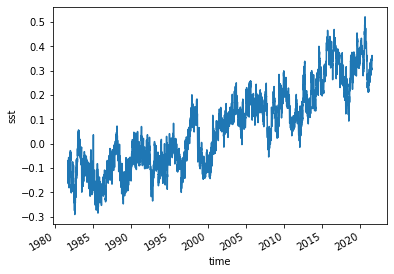

In [4]:
# Timeline for global anomalies
# wonderful tool to calculate spatial mean by using dim variable names
mean_anomalies = oisst_anomalies.mean(['lat', 'lon']) 
mean_anomalies.sst.plot(label = "Global - Un-Weighted")

## Area-weighted means

In [ ]:
# Get area-weighted means
weighted_means = ot.area_weighted_means(oisst_anomalies, var_name = "sst", sd = False)
weighted_means.area_wtd_sst.plot(label = "Global - Area-Weighted")

NameError: name 'plt' is not defined

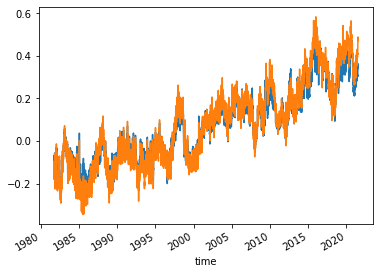

In [7]:
# Comparison Plot
mean_anomalies.sst.plot(label = "Global - Un-Weighted")
weighted_means.plot(label = "Global - Area-Weighted")
plt.legend()

In [8]:
# convert anomalies to a dataframe from xr.array
anom_df = mean_anomalies.sst.to_dataframe()
anom_df.tail()

,MOD,modified_ordinal_day,sst
time,,,
1981-09-01,245,245,-0.069423
1981-09-02,246,246,-0.082091
1981-09-03,247,247,-0.085882
1981-09-04,248,248,-0.092171
1981-09-05,249,249,-0.102719


In [20]:
# Convert to dataframe
anoms_wtd = mean_anomalies.sst_to_dataframe()
anoms_wtd.tail()

AttributeError: 'Dataset' object has no attribute 'sst_to_dataframe'

In [10]:
# SAVING
anom_df.to_csv(f"{box_root}Res_Data/OISST/oisst_mainstays/global_timeseries/global_anoms_1982to2011.csv")

---

# Global Temps

Do the same steps but for raw temperature...

In [2]:
# Load temps
start_yr = 1981
end_yr   = 2021

# Load OISSt using ot.load_box_oisst()
oisst = ot.load_box_oisst(box_root, 
                          start_yr, 
                          end_yr, 
                          anomalies = False, 
                          do_parallel = True)

## Timeline for global anomalies
# wonderful tool to calculate spatial mean by using dim variable names
mean_temps = oisst.mean(['lat', 'lon']) 

# convert anomalies to a dataframe from xr.array
temp_df = mean_temps.sst.to_dataframe()
temp_df.tail()


,sst
time,
2021-07-24 12:00:00,14.157196
2021-07-25 12:00:00,14.157386
2021-07-26 12:00:00,14.152558
2021-07-27 12:00:00,14.166090
2021-07-28 12:00:00,14.176355


Processing Area-Weighted Means


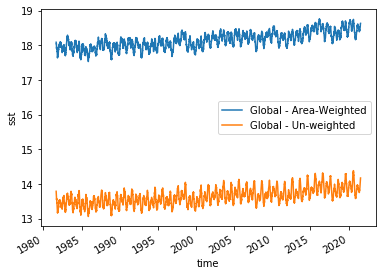

In [3]:
# Area Weighted
area_means = ot.area_weighted_means(oisst, var_name = "sst", sd = False)
area_means.sst.plot(label = "Global - Area-Weighted")
mean_temps.sst.plot(label = "Global - Un-weighted")
plt.legend()

In [3]:
# SAVING
temp_df.to_csv(f"{box_root}Res_Data/OISST/oisst_mainstays/global_timeseries/global_temps_oisst.csv")